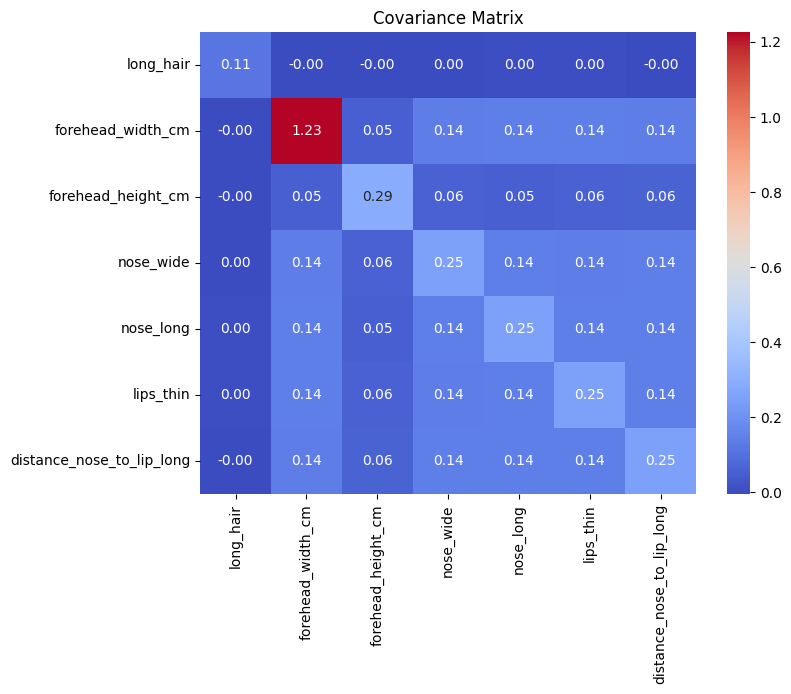

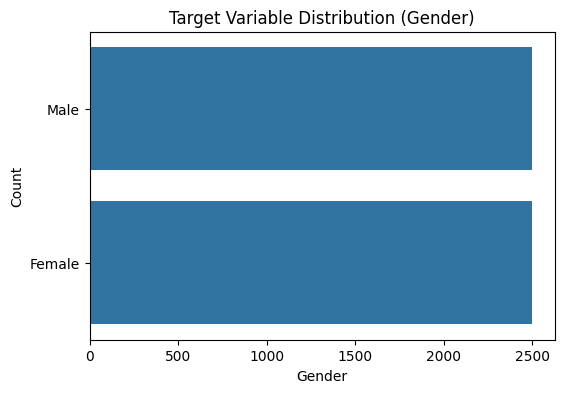

Accuracy: 96.40%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

Confusion Matrix:
 [[487  15]
 [ 21 478]]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv("/content/gender_classification_v7 (1).csv")


# Convert categorical columns to numerical if necessary (e.g., 'Gender' column)
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})  # Convert Male to 1, Female to 0

# Display the covariance matrix (excluding any remaining non-numeric columns)
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.cov(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix")
plt.show()


# Target variable distribution chart (assuming 'gender' is the target variable)
plt.figure(figsize=(6, 4))
sns.countplot(data['gender'])
plt.title("Target Variable Distribution (Gender)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Encode the target variable
data['gender'] = LabelEncoder().fit_transform(data['gender'])

# Separate features and target variable
X = data.drop('gender', axis=1)
y = data['gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model  var_smoothng0.000000001
#in naive bayes to calculate probability we perform division, so if a
#value is 0 it will create division by 0 error hence we perform var_smoothing
#to add a small value so to avoid 0 and gain stability
naive_bayes = GaussianNB(var_smoothing=1e-9)
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
